In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from math import cos, pi, sin

In [24]:
def slow(img):
    img = np.array(img)
    img = img.astype('complex')
    N = img.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    ans = np.array(np.dot(M, img))
    return ans.astype('complex')

def my_fft(img):
    img = np.asarray(img)
    img = img.astype('complex')
    size = img.shape[0]
    if size <= 32:
        return slow(img)
    else:
        FFT_even = my_fft(img[::2])
        FFT_odd = my_fft(img[1::2])
        exponent = np.exp(-2j * np.pi * np.arange(size)/size)
        ans = np.concatenate([FFT_even + exponent[:int(size / 2)] * FFT_odd, FFT_even + exponent[int(size / 2):] * FFT_odd])
        return ans.astype('complex')


In [25]:
# x = np.random.random(1024)
img = Image.open('../input_data/lena.jpg').convert('L')
img = np.array(img)
# print(x)
# print(my_fft(x))
np.allclose(my_fft(img[:,1]), np.fft.fft(img[:,1]))

True

In [26]:
def twoDFFT(img):
#     img = np.array(img)
    temp = np.zeros(img.shape)
    temp = temp.astype('complex')
    ans = np.zeros(img.shape)
    ans = ans.astype('complex')
    row,col = img.shape
    for i in range(col):
        temp[:,i] = my_fft(img[:,i]).ravel()
    for i in range(row):
        ans[i,:] = my_fft(temp[i,:]).ravel()
    return ans

In [27]:
img = Image.open('../input_data/lena.jpg').convert('L')
img = np.array(img)
ans = twoDFFT(img)
np.allclose(ans, np.fft.fft2(img))

True

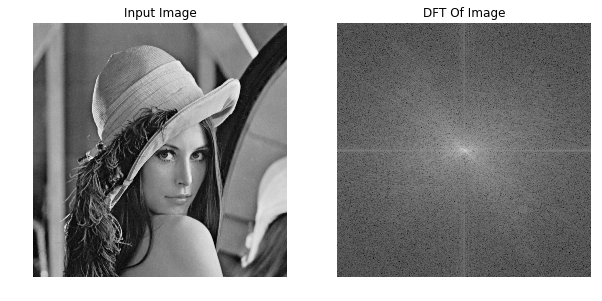

In [29]:
img = Image.open('../input_data/lena.jpg').convert('L')
img = np.array(img)
ans = np.fft.fftshift(twoDFFT(img))
ans = 20*np.log(1+np.abs(ans))

figure = plt.figure(figsize=[10,10])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'),plt.axis('off')
plt.subplot(122),plt.imshow(ans, cmap = 'gray')
plt.title('DFT Of Image'),plt.axis('off')
plt.show()
